# Fabio_Parra -  fabiolbparra@gmail.com

## Questao 1: No dataset existem alguns valores faltantes. Antes de começar a manipular os dados, trate essas informações e descreva sucintamente as alterações feitas:

__R: Add apenas os valores numericos. Verifique que nao tinha tanta nessecidade de preencher os valores de string.__

In [19]:
import pandas as pd

#substituindo valores vazios de colunas numericas
df = pd.read_csv('Drugs.csv')

#selecionando apenas colunas de int ou float
num_columns = df.select_dtypes(include=['int', 'float']).columns 

df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

df.to_csv('Drugs_check.csv', index=False)

In [20]:
#verificando quais colunas tem linhas vazias (string)
df = pd.read_csv('Drugs_check.csv')

na_columns = df.columns[df.isnull().any()]

print("NA Columns in dataframe:")

for col in na_columns:
    print(col)



NA Columns in dataframe:
Gender
Education
Country
Ethnicity
Impulsive
Alcohol
Amphet
Amyl
Benzos
Caff
Cannabis
Choc
Coke
Crack


In [21]:
#na celula de cima conseguir ver que tem muitas colunas, agora irei ver a porcentagem, pra ver se tem nescecidade de alterar elas

In [22]:
#verificando o tamanho maximo de linhas e comparando com colunas 
num_total_lines = df.shape[0]
print("total de linhas:" ,num_total_lines)

for col in na_columns:
    print(col)
    print("Num de linhas vazias/total linhas:", \
          df[col].isnull().sum(),'-', 
          num_total_lines
         )


total de linhas: 1884
Gender
Num de linhas vazias/total linhas: 4 - 1884
Education
Num de linhas vazias/total linhas: 3 - 1884
Country
Num de linhas vazias/total linhas: 1 - 1884
Ethnicity
Num de linhas vazias/total linhas: 2 - 1884
Impulsive
Num de linhas vazias/total linhas: 3 - 1884
Alcohol
Num de linhas vazias/total linhas: 3 - 1884
Amphet
Num de linhas vazias/total linhas: 2 - 1884
Amyl
Num de linhas vazias/total linhas: 2 - 1884
Benzos
Num de linhas vazias/total linhas: 2 - 1884
Caff
Num de linhas vazias/total linhas: 4 - 1884
Cannabis
Num de linhas vazias/total linhas: 1 - 1884
Choc
Num de linhas vazias/total linhas: 2 - 1884
Coke
Num de linhas vazias/total linhas: 1 - 1884
Crack
Num de linhas vazias/total linhas: 1 - 1884


In [23]:
#Verifiquei que sao bem poucas entao n vai fazer tanta diferenca assim, fechamos a questao 1 aqui

## Questao 2: Qual é a distribuição da idade dos indivíduos na amostra? Existem diferenças significativas nas faixas etárias predominantes de consumo entre os grupos de usuários de diferentes substâncias?

__R:A maior parte da pesquisa foi feita com jovens com quase 35% (18-24) anos.
O consumo até um ano de qualquer droga também ficou para os jovens, então posso afirmar que existe uma diferença, sendo que mais 600 jovens consumiram drogas em até 1 ano enquanto os velhos (65+) não chegam nem a 50 os que dizem que consumiram até o último ano. Pesquisa realizada levando em conta apenas CL3 a CL6.__

### Graficos:

Age
18-24    643
25-34    481
35-44    355
45-54    294
55-64     93
65+       18
Name: count, dtype: int64


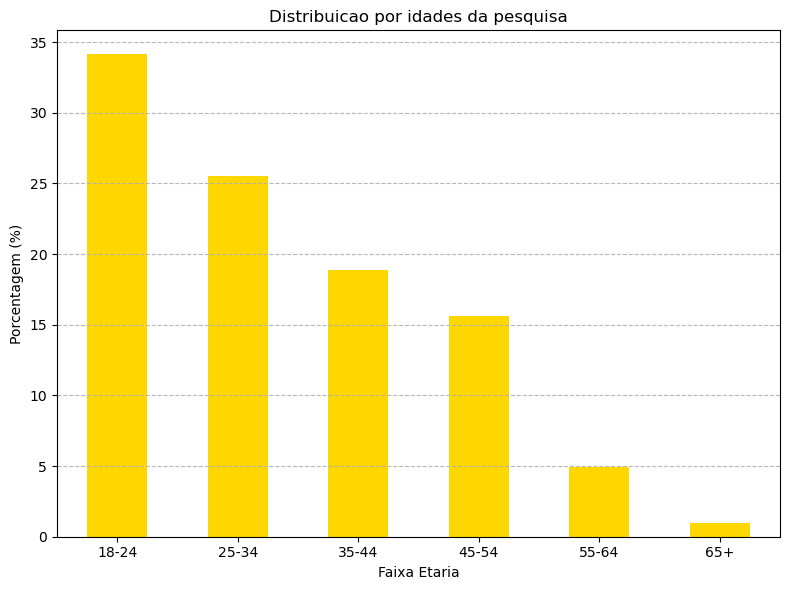

In [24]:
import matplotlib.pyplot as plt

df = pd.read_csv('Drugs_check.csv')

count_faixa_idades = df['Age'].value_counts()

print(count_faixa_idades)

#pegando a porcentagem

porcentagem_idades = (count_faixa_idades / df.shape[0]) * 100


plt.figure(figsize=(8, 6))

porcentagem_idades.plot(kind='bar', color='gold')
plt.title('Distribuicao por idades da pesquisa')
plt.xlabel('Faixa Etaria')
plt.ylabel('Porcentagem (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

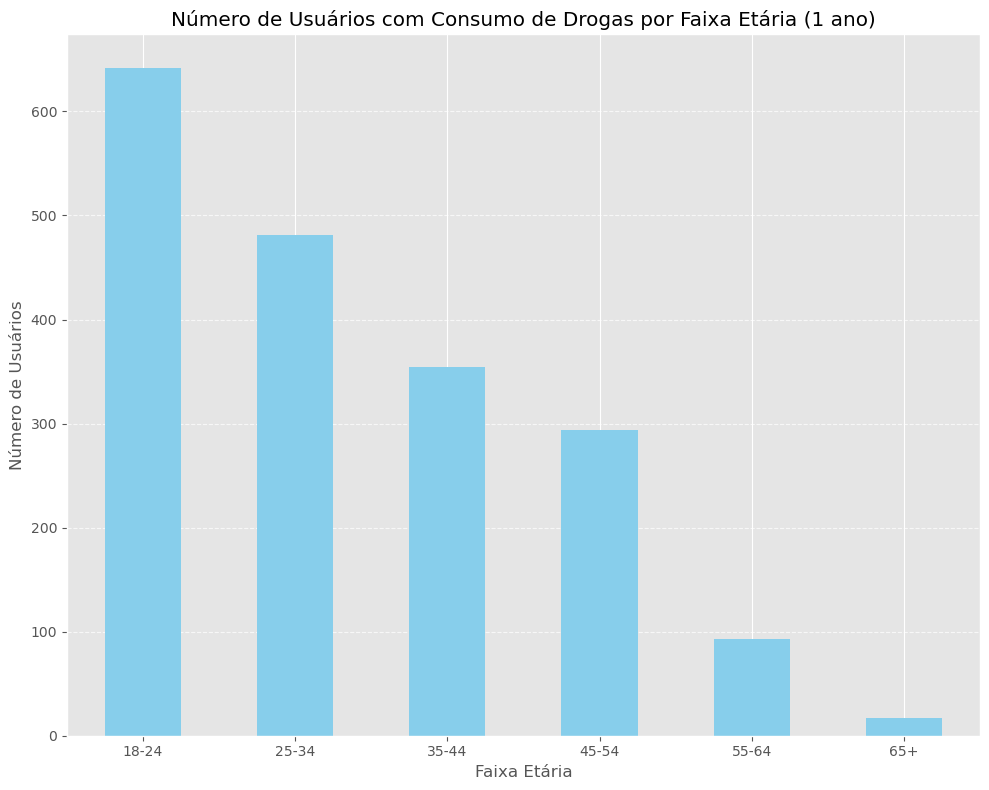


CONSUMO DE TODAS AS DROGAS:



In [72]:
drugs = [ 'Alcohol', 'Amphet', 'LSD', 'Amyl', 'Benzos','Caff','Cannabis', 
         'Choc', 'Coke', 'Crack','Ecstasy', 'Heroin', 'Ketamine', 
         'Legalh', 'Meth', 'Mushrooms', 'Nicotine' ]


#mapeando pelo consumo ate o ultimo ano = CL3

df['Consumo_alto'] = df[drugs].apply(lambda row: any(val in ['CL3','CL4', 'CL5', 'CL6'] for val in row), axis=1)

consumo_por_idade_alto = df[df['Consumo_alto']].groupby('Age').size()


consumo_por_idade_alto.plot(kind = 'bar', figsize=(10,8), color= 'skyblue')
plt.title('Número de Usuários com Consumo de Drogas por Faixa Etária (1 ano)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Usuários')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#fazer considerando cl1 e cl2
print()
print("CONSUMO DE TODAS AS DROGAS:")
df['Consumo_total'] = df[drugs].apply(lambda row: any(val in ['CL1' ,'CL2' ,'CL3','CL4', 'CL5', 'CL6'] for val in row), axis=1)
print()

df.to_csv('Drugs_add_consum_total.csv', index=False)


## Questao 3:Há uma relação entre o nível educacional e o consumo de substâncias?

__R: A maior parte da pesquisa foi feita com jovens com quase 35% (18-24) anos.
O consumo até um ano de qualquer droga também ficou para os jovens, então posso afirmar que existe uma diferença, sendo que mais 600 jovens consumiram drogas em até 1 ano enquanto os velhos (65+) não chegam nem a 50 os que dizem que consumiram até o último ano. Pesquisa realizada levando em conta apenas CL3 a CL6.__

### Graficos:

Text(0, 0.5, 'Numero de consumidores')

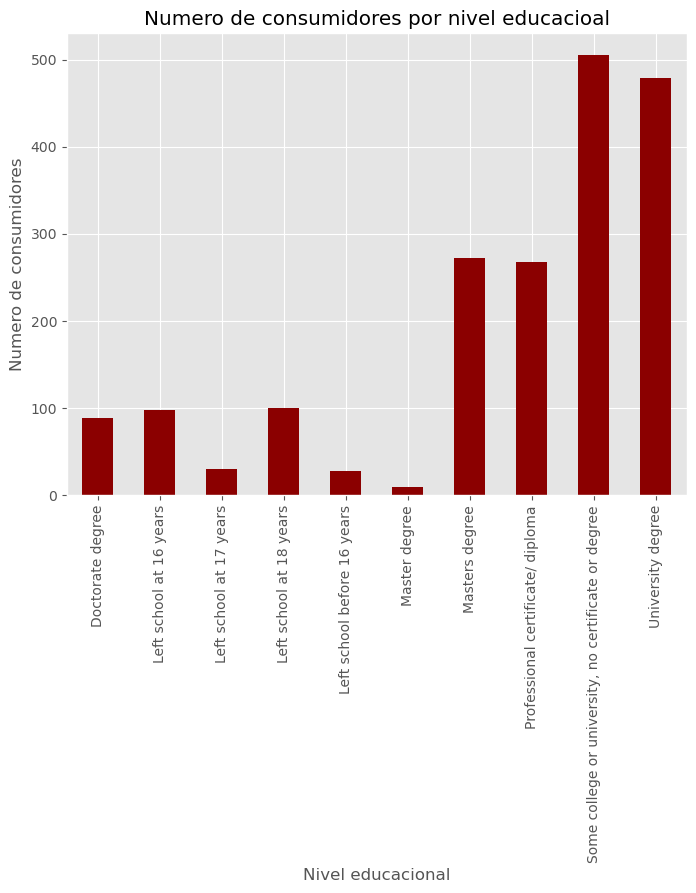

In [69]:
drugs = [ 'Alcohol', 'Amphet', 'LSD', 'Amyl', 'Benzos','Caff','Cannabis', 
         'Choc', 'Coke', 'Crack','Ecstasy', 'Heroin', 'Ketamine', 
         'Legalh', 'Meth', 'Mushrooms', 'Nicotine' ]


#mapeando pelo consumo ate o ultimo ano = CL3

df['Consumo_alto'] = df[drugs].apply(lambda row: any(val in ['CL3','CL4', 'CL5', 'CL6'] for val in row), axis=1)

consumo_por_idade_alto = df[df['Consumo_alto']].groupby('Age').size()

consumo_por_nivel_educaciona = df[df['Consumo_alto']].groupby('Education').size()

consumo_por_nivel_educaciona.plot(kind= 'bar', figsize=(8,6), color='darkred')
plt.title('Numero de consumidores por nivel educacioal')
plt.xlabel('Nivel educacional')
plt.ylabel('Numero de consumidores')

## Questao 4:  Pelo que foi notado na análise que fiz, o gênero masculino é sempre mais evidente no uso dessas drogas. Gráficos mostram que o gênero masculino é propenso a usar essas drogas alucinógenas. O gênero feminino está mais propenso a não usar.


__R: Pelo que foi notado na análise que fiz, o gênero masculino é sempre mais evidente no uso dessas drogas. Gráficos mostram que o gênero masculino é propenso a usar essas drogas alucinógenas. O gênero feminino está mais propenso a não usar.__

### Graficos:

        Nao uso  Uso
Gender              
F           650  287
M           415  528


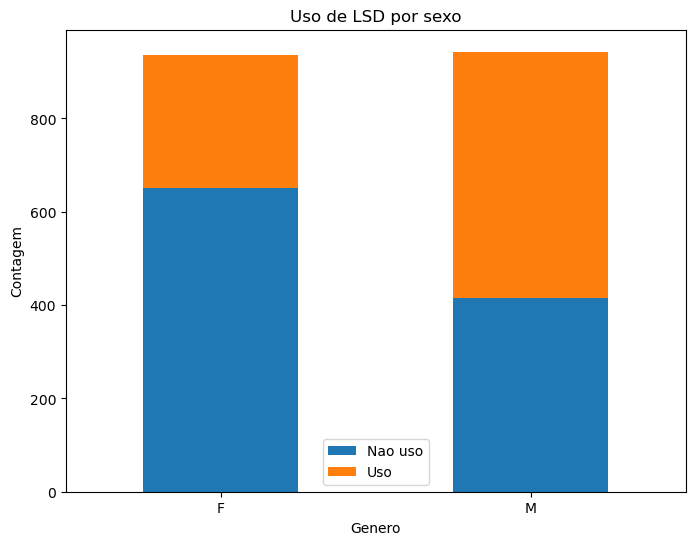

        Nao Uso  Uso
Gender              
F           610  327
M           407  536


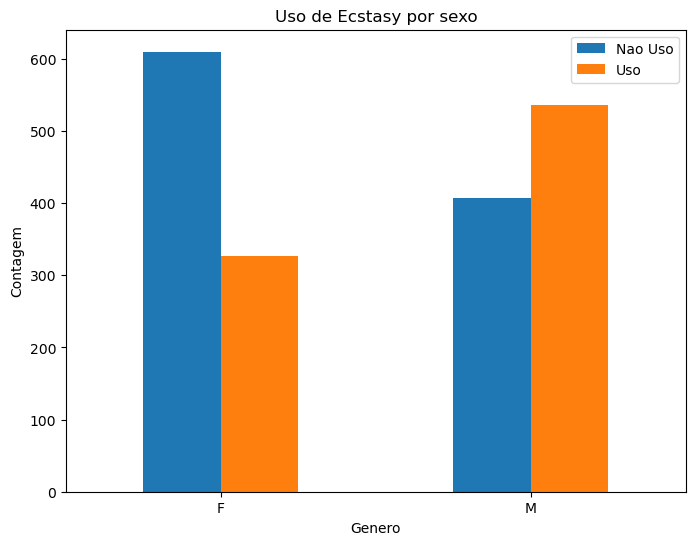

        Nao Uso  Uso
Gender              
F           610  327
M           407  536


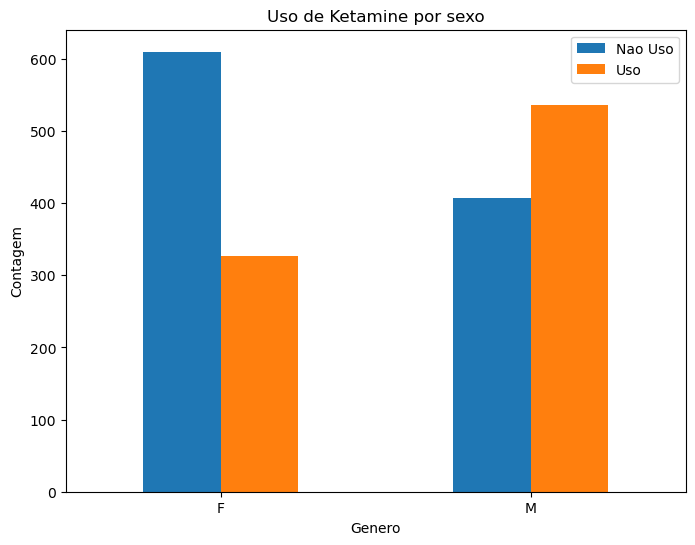

        Nao Uso  Uso
Gender              
F           293  644
M           117  826


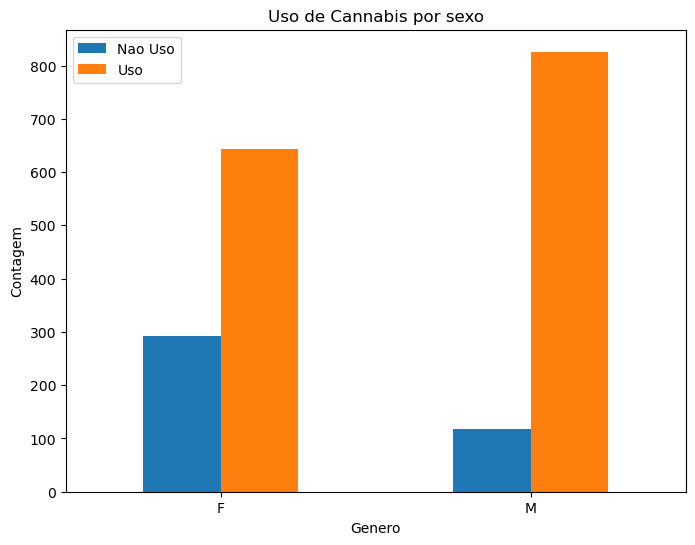

        Nao Uso  Uso
Gender              
F           293  644
M           117  826


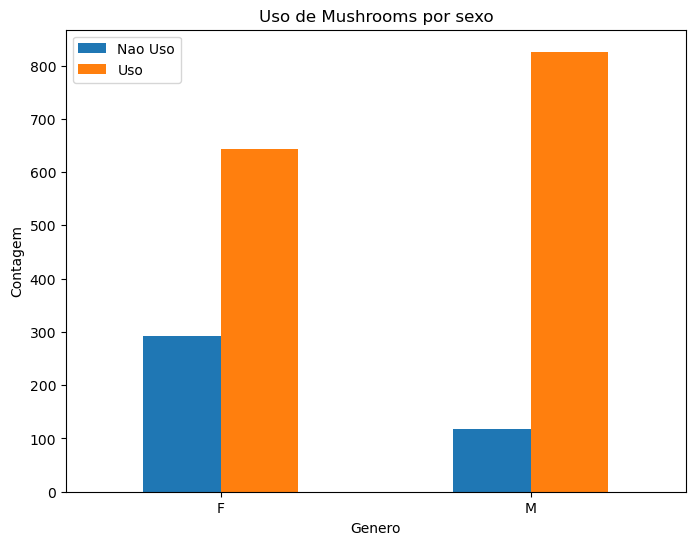

In [26]:
drugs_halluc = ['LSD', 'Ecstasy', 'Ketamine',
                'Cannabis' , 'Mushrooms']
#consumo de drogas alucionogenas

df = pd.read_csv('Drugs_add_consum_total.csv')

df['LSD_Uso'] = df['LSD'] != 'CL0'
count_lsd_sexo = df.groupby(['Gender', 'LSD_Uso']).size().unstack(fill_value=0)

#mudando nome de uso e nao uso
count_lsd_sexo.columns = ['Nao uso', 'Uso']

print(count_lsd_sexo)

count_lsd_sexo.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Uso de LSD por sexo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

#Ecstasy
df['Ecstasy_Uso'] =  df['Ecstasy'] != 'CL0'
count_ecstasy = df.groupby(['Gender', 'Ecstasy_Uso']).size().unstack(fill_value=0)

count_ecstasy.columns = ['Nao Uso', 'Uso']

print(count_ecstasy)
count_ecstasy.plot(kind='bar', figsize=(8,6))
plt.title('Uso de Ecstasy por sexo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

#Ketamine
df['Ketamine_Uso'] =  df['Ecstasy'] != 'CL0'
count_Ketamine = df.groupby(['Gender', 'Ketamine_Uso']).size().unstack(fill_value=0)

count_Ketamine.columns = ['Nao Uso', 'Uso']

print(count_Ketamine)
count_ecstasy.plot(kind='bar', figsize=(8,6))
plt.title('Uso de Ketamine por sexo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

#Cannabis
df['Cannabis_Uso'] =  df['Cannabis'] != 'CL0'
count_Cannabis = df.groupby(['Gender', 'Cannabis_Uso']).size().unstack(fill_value=0)

count_Cannabis.columns = ['Nao Uso', 'Uso']

print(count_Cannabis)
count_Cannabis.plot(kind='bar', figsize=(8,6))
plt.title('Uso de Cannabis por sexo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()

#Mushrooms
df['Mushrooms_Uso'] =  df['Cannabis'] != 'CL0'
count_Mushrooms = df.groupby(['Gender', 'Mushrooms_Uso']).size().unstack(fill_value=0)

count_Mushrooms.columns = ['Nao Uso', 'Uso']

print(count_Mushrooms)
count_Mushrooms.plot(kind='bar', figsize=(8,6))
plt.title('Uso de Mushrooms por sexo')
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.xticks(rotation=0)

plt.show()



                                                                

## Questao 5 - Qual é a proporção de participantes que se auto-classificam como impulsivos (score superior a zero)? Existe uma correlação entre a impulsividade e o consumo de substâncias?

__R: Arredondando sao 49% se consideram como impulsivos. Vendo os graficos analisando duas drogas batante famosas (Cannabis e Heroin) com uma coluna de impulsividade criada podemos afirma que impulsivos tem mais disposicao para vicios nessas drogas. Por via das duvidas tambem analisei a droga do LSD e recebi o mesmo resultado. Impulsivos geralmente tem mais predisposicao para o vicio, ja que analisei CL5 e CL6__ 

In [33]:
print("Analise Proporcao impulsividade:")
coluna = 'Impulsive'

df = pd.read_csv("Drugs_add_consum_total.csv")

conversao_numeric = pd.to_numeric(df[coluna], errors= 'coerce')

print( "Valores nulos:" , conversao_numeric.isna().sum()) #verifique que sao poucas linhas vazias que existem.

sao_impulsivos = (conversao_numeric > 0).sum()
nao_impulsivos = (conversao_numeric < 0).sum()


#proposicao = sao_impulsivos.value_counts(normalize=True)

print('Sao impulsivos:', sao_impulsivos)
print('Nao sao impulsivos:', nao_impulsivos)


Analise Proporcao impulsividade:
Valores nulos: 4
Sao impulsivos: 925
Nao sao impulsivos: 955


### Grafico de pizza para proporcao

In [ ]:
labels = ["Impulsivos", "Nao Impulsivos"]
sizes = [sao_impulsivos, nao_impulsivos]
colors = ["salmon", "skyblue"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Proporcao de impulsividade da pesquisa")

plt.show()


### Relacionando impulsividade com o uso de drogas.

In [35]:
df["Sao_Impulsivos"] = conversao_numeric > 0
df['Consumo_CL6'] = df[drugs].apply(lambda row: any(val in ['CL6'] for val in row), axis=1)
df['Consumo_CL6_CL5'] = df[drugs].apply(lambda row: any(val in ['CL5','CL6'] for val in row), axis=1)

In [36]:
#minha teoria e que vai existir mais usuarios impulsivos CL6 do que nao impulsivos.
consumo_alto_impusividade6 = df[df['Consumo_CL6']].groupby('Sao_Impulsivos').size()
consumo_alto_impusividade5 = df[df['Consumo_CL6_CL5']].groupby('Sao_Impulsivos').size()
print(consumo_alto_impusividade6)
print(consumo_alto_impusividade5)
#apesar da teoria esta certa (nmargem bem pequena) temos que ir um pouco mais afundo e pegar drogas especifica e nao um todo.
#Se colocarmos CL5, impusividade nao faz tanto efeito.

Sao_Impulsivos
False    861
True     869
dtype: int64
Sao_Impulsivos
False    950
True     919
dtype: int64


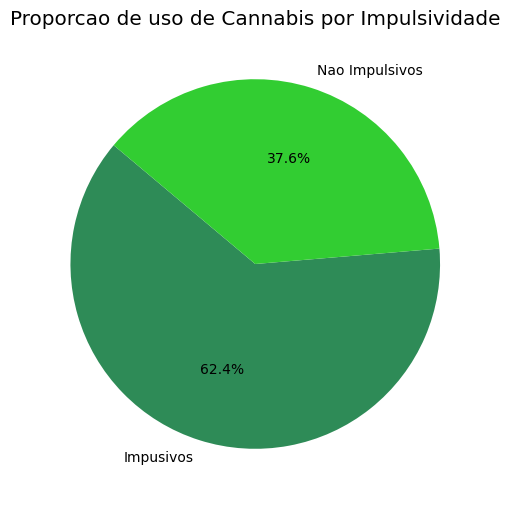

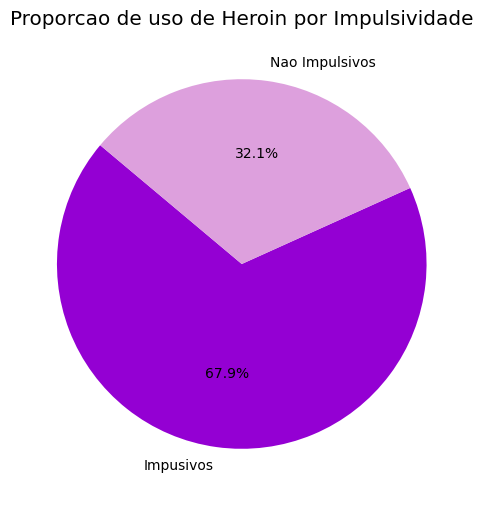

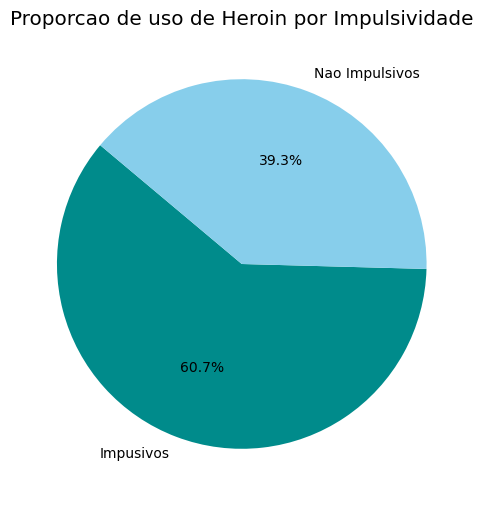

In [37]:
#Vamos pegar a droga mais usada do mundo Cannabis...
df_canabis_cl6 = df[(df['Cannabis']=='CL6') | (df['Cannabis'] =='CL5')]

proporcao_cl6_imp = df_canabis_cl6['Sao_Impulsivos'].mean()* 100

labels = ['Impusivos', 'Nao Impulsivos']
sizes = [proporcao_cl6_imp, 100 - proporcao_cl6_imp]
colors = [ 'seagreen', 'limegreen']



plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',  labeldistance = 1.1,startangle=140)
plt.title("Proporcao de uso de Cannabis por Impulsividade")
plt.show()

#Vamos pegar a droga que mais vicia Heroin

df_Heroin_cl6 = df[(df['Heroin']=='CL6') | (df['Heroin'] =='CL5')]

proporcao_cl6_imp_Heroin = df_Heroin_cl6['Sao_Impulsivos'].mean()* 100

labels = ['Impusivos', 'Nao Impulsivos']
sizes = [proporcao_cl6_imp_Heroin, 100 - proporcao_cl6_imp]
colors = [ 'darkviolet', 'plum']

plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',  labeldistance = 1.1,startangle=140)
plt.title("Proporcao de uso de Heroin por Impulsividade")
plt.show()


df_LSD_cl6 = df[(df['LSD']=='CL6') | (df['LSD'] =='CL5')]

proporcao_cl6_imp_LSD = df_LSD_cl6['Sao_Impulsivos'].mean()* 100

labels = ['Impusivos', 'Nao Impulsivos']
sizes = [proporcao_cl6_imp_LSD, 100 - proporcao_cl6_imp]
colors = [ 'darkcyan', 'skyblue']

plt.style.use("ggplot")
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',  labeldistance = 1.1,startangle=140)
plt.title("Proporcao de uso de Heroin por Impulsividade")
plt.show()


## Questao 6: Classifique as variáveis entre qualitativas (ordinal ou nominal), ou quantitativas (discreta, contínuas).

In [ ]:
df.dtypes

1. ID: é um número de registros em um banco de dados original. **Nominal**
Não pode ser relacionado ao participante. Pode ser usado apenas
como referência.
2. Age (Real): é a idade do participante. **Ordinal**
3. Gender: Masculino ou Feminino. **Nominal**
4. Education: nível de educação do participante.  **Ordinal**
5. Country: país de origem do participante. **Nominal**
6. Ethnicity: etnia do participante. **Nominal**
7. Income (USD): renda mensal em dólares. **Discreta**
8. Nscore (Real): é o Neuroticismo da NEO-FFI-R. **Contínua**
9. Escore (Real): é a Extraversão da NEO-FFI-R. **Contínua**
10. Oscore (Real): é a Abertura à Experiência da NEO-FFI-R. **Contínua**
11. AScore (Real): é a Amabilidade da NEO-FFI-R. **Contínua**
12. Cscore (Real): é a Conscienciosidade da NEO-FFI-R. **Contínua**
13. Impulsive (Real): é impulsividade medida pelo BIS-11. **Contínua**
14. SS (Real): é percepção sensorial medida pela ImpSS. **Contínua**
15. Alcohol: consumo de álcool. **Ordinal**
16. Amphet: consumo de anfetaminas. **Ordinal**
17. Amyl: consumo de nitritos (poppers). **Ordinal**
18. Benzos: consumo de benzodiazepínicos. **Ordinal**
19. Caff: consumo de cafeína. **Ordinal**
20. Cannabis: consumo de maconha. **Ordinal**
21. Choc: consumo de chocolate. **Ordinal**
22. Coke: consumo de cocaína. **Ordinal**
23. Crack: consumo de crack. **Ordinal**
24. Ecstasy: consumo de êxtase. **Ordinal**
25. Heroin: consumo de heroína. **Ordinal**
26. Ketamine: consumo de quetamina. **Ordinal**
27. Legalh: consumo de altos legais.  **Ordinal**
28. LSD: consumo de LSD. **Ordinal**
29. Meth: consumo de metadona. **Ordinal**
30. Mushrooms: consumo de cogumelos mágicos. **Ordinal**
31. Nicotine: consumo de nicotina. **Ordinal**
32. Semer: classe de consumo fictício de droga Semeron (ou seja, controle). **Ordinal**
33. VSA: classe de consumo de abuso de substâncias voláteis. **Ordinal**

## Questao 7: Qual é a proporção de consumo de substâncias legais versus ilícitas na amostra (considere a definição de legalidade segundo a legislação brasileira)?

__R: Evidentemente que a logica venceu. Substancias legais sao mais consumidas, visivelmente no grafico.__

In [68]:
# Substâncias legais
subs_legais = ['Alcohol', 'Caff', 'Choc', 'Nicotine']

subs_ilegais = [
    'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack',
    'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
    'Mushrooms', 'Semer', 'VSA']

#eliminei o uso de substancias da ultima decada e deixei apenas o do ultimo ano para deixar mais atual.
df["uso_ilegal_drugs"] = df[subs_ilegais].apply(lambda row: any(val in ['CL3','CL4', 'CL5', 'CL6'] for val in row), axis=1)
df["uso_legal_drugs"] = df[subs_legais].apply(lambda row: any(val in ['CL3','CL4', 'CL5', 'CL6'] for val in row), axis=1)

contagem_uso_ilegal = df["uso_ilegal_drugs"].value_counts()
contagem_uso_legal = df["uso_legal_drugs"].value_counts()

print(contagem_uso_legal, contagem_uso_ilegal)


uso_legal_drugs
True     1881
False       3
Name: count, dtype: int64 uso_ilegal_drugs
True     1179
False     705
Name: count, dtype: int64


### Graficos

([<matplotlib.axis.XTick at 0x724284794390>,
 [Text(0, 0, 'Sim'), Text(1, 0, 'Nao')])

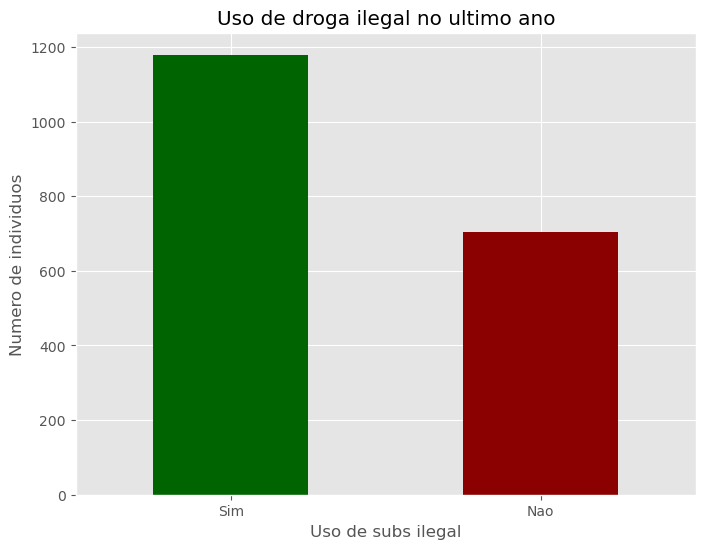

In [63]:
#grafico uso ilegal
plt.figure(figsize=(8,6))
contagem_uso_ilegal.plot(kind='bar', color = ['darkgreen','darkred'])
plt.xlabel('Uso de subs ilegal')
plt.ylabel('Numero de individuos')
plt.title('Uso de droga ilegal no ultimo ano')
plt.xticks(ticks=[0,1], labels = ['Sim', 'Nao'], rotation=0)

([<matplotlib.axis.XTick at 0x72428467af90>,
 [Text(0, 0, 'Sim'), Text(1, 0, 'Nao')])

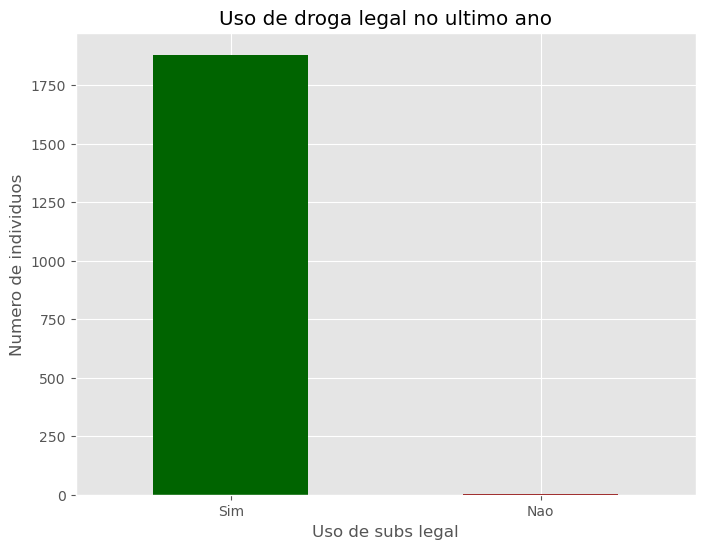

In [65]:
#grafico uso legal
plt.figure(figsize=(8,6))
contagem_uso_legal.plot(kind='bar', color = ['darkgreen','darkred'])
plt.xlabel('Uso de subs legal')
plt.ylabel('Numero de individuos')
plt.title('Uso de droga legal no ultimo ano')
plt.xticks(ticks=[0,1], labels = ['Sim', 'Nao'], rotation=0)

## Questao 8: Quais fatores predizem a probabilidade de um indivíduo consumir crack(Crack)?

__R:__

In [73]:
df['Crack'].value_counts()

Crack
CL0    1625
CL2     112
CL1      67
CL3      59
CL5       9
CL4       9
CL6       2
Name: count, dtype: int64

ValueError: could not convert string to float: '25-34'